In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import re
import datetime
import random
import os

In [2]:
# E:\day-ahead price\Code\Time-Series-Library-main\Time-Series-Library-main\data
df_data = pd.read_csv('E:/day-ahead price/Code/Time-Series-Library-main/Time-Series-Library-main/data/iso_new_england.csv')
df_data['date'] = pd.to_datetime(df_data['date'])

In [3]:
df_data['gap1'] = df_data['Load1'] - df_data['New Energy1']
df_data

,date,Load,Load1,New Energy,New Energy1,Real Capa,Pred Capa,Real Deficiency,Pred Deficiency,Price,gap1
0,2022-10-02 01:00:00,8896.0,9560.000,691.274,290.0,17189.0,24366.0,1456.0,7883.0,44.079334,9270.000
1,2022-10-02 02:00:00,8998.0,9230.001,693.860,271.0,17189.0,24366.0,1456.0,7883.0,39.842475,8959.001
2,2022-10-02 03:00:00,9044.0,9100.000,692.422,251.0,17189.0,24366.0,1456.0,7883.0,41.130905,8849.000
3,2022-10-02 04:00:00,8982.0,9109.999,676.568,229.0,17189.0,24366.0,1456.0,7883.0,39.645872,8880.999
4,2022-10-02 05:00:00,9050.0,9430.000,661.997,208.0,17189.0,24366.0,1456.0,7883.0,39.728651,9222.000
...,...,...,...,...,...,...,...,...,...,...,...
10867,2023-12-31 20:00:00,14525.0,15410.000,85.163,160.0,19596.0,31738.0,1723.0,13255.0,33.131908,15250.000
10868,2023-12-31 21:00:00,14171.0,14870.000,60.978,145.0,19596.0,31738.0,1723.0,13255.0,34.283438,14725.000
10869,2023-12-31 22:00:00,13362.0,14110.001,54.639,151.0,19596.0,31738.0,1723.0,13255.0,31.938092,13959.001
10870,2023-12-31 23:00:00,12646.0,13180.000,54.511,176.0,19596.0,31738.0,1723.0,13255.0,27.729975,13004.000


In [4]:
def search_gap2_variety():
    # record the gap2 index if it is larger or smaller than its 96*7 lr2 data points before
    gap2_variety = []
    for i in range(96*7, len(df_data)):
        if df_data['gap1'][i] > df_data['gap1'][i-24*7:i].max() or df_data['gap1'][i] < df_data['gap1'][i-24*7:i].min():
            gap2_variety.append(i)
    return gap2_variety

gap2_list = search_gap2_variety()
df_data.iloc[gap2_list]

,date,Load,Load1,New Energy,New Energy1,Real Capa,Pred Capa,Real Deficiency,Pred Deficiency,Price,gap1
721,2022-11-01 02:00:00,10107.0,9460.002,234.223,825.0,18373.0,23125.0,1488.0,6702.0,38.662961,8635.002
722,2022-11-01 03:00:00,10230.0,9229.999,203.313,836.0,18373.0,23125.0,1488.0,6702.0,38.725197,8393.999
818,2022-11-05 03:00:00,9009.0,9380.000,827.951,1113.0,17856.0,22340.0,2052.0,5107.0,19.780485,8267.000
819,2022-11-05 04:00:00,8949.0,9210.002,842.784,1145.0,17856.0,22340.0,2052.0,5107.0,19.012179,8065.002
905,2022-11-08 18:00:00,14380.0,14880.000,1098.525,190.0,18729.0,23540.0,1545.0,6177.0,68.862706,14690.000
...,...,...,...,...,...,...,...,...,...,...,...
10345,2023-12-10 02:00:00,10102.0,9820.000,577.394,571.0,19550.0,28104.0,2048.0,9221.0,21.046702,9249.000
10346,2023-12-10 03:00:00,9964.0,9660.001,571.524,547.0,19550.0,28104.0,2048.0,9221.0,20.203339,9113.001
10514,2023-12-17 03:00:00,11168.0,9890.001,655.321,958.0,19459.0,29854.0,1846.0,11611.0,20.522344,8932.001
10625,2023-12-21 18:00:00,17305.0,16990.001,904.010,136.0,21270.0,29975.0,1420.0,10502.0,99.241414,16854.001


In [5]:
df_case = df_data.iloc[gap2_list]
df_case['date'] = pd.to_datetime(df_case['date'])
df_case['day'] = df_case['date'].dt.date
df_case['day'].describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_10852\54369747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case['date'] = pd.to_datetime(df_case['date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_10852\54369747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case['day'] = df_case['date'].dt.date


count            293
unique           131
top       2023-08-19
freq               6
Name: day, dtype: object

In [6]:
# select df_case['day'] where count > 4
df_case['day'].value_counts().describe()
df_case['day'].value_counts().sort_values(ascending=False)[:10].index


Index([2023-08-19, 2023-09-30, 2023-06-24, 2023-03-11, 2023-04-01, 2023-07-22,
       2022-11-25, 2023-07-01, 2022-12-31, 2023-09-04],
      dtype='object', name='day')

In [3]:
df_pred_rf = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/rf_pred.csv')
df_pred_rf.columns = ['Date', 'pred', 'truth']
df_pred_rf['Date'] = pd.to_datetime(df_pred_rf['Date'])
df_pred_rf1 = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/rf_pred_extend.csv')
df_pred_rf1.columns = ['Date', 'pred', 'truth']
df_pred_rf1['Date'] = pd.to_datetime(df_pred_rf1['Date'])
df_pred_rf = pd.concat([df_pred_rf, df_pred_rf1], axis=0)
df_pred_rf

,Date,pred,truth
0,2023-01-01,[39.39697163 35.93197048 38.45777796 35.641084...,[31.08916941 28.27474507 26.67407072 28.031077...
1,2023-01-02,[32.65035757 33.38523347 30.71150699 30.732789...,[33.68778783 30.9038898 30.87960526 30.727425...
2,2023-01-03,[38.98137508 37.39834391 35.93479646 36.222611...,[42.11875 39.51162829 38.51834704 40.938601...
3,2023-01-04,[41.80335929 38.82719827 37.81742796 40.217192...,[37.99967928 36.686875 37.93543586 35.935797...
4,2023-01-05,[ 39.89647812 38.62065419 39.04692656 37.16...,[31.37074836 30.57749178 28.82582237 30.084753...
...,...,...,...
87,2023-12-27,[21.77902798 21.11253721 21.06573778 20.227094...,[21.99087171 21.58410362 20.01557566 18.807886...
88,2023-12-28,[21.71137448 20.60254612 20.11163003 19.720549...,[21.02164474 21.23584704 20.06485197 19.760649...
89,2023-12-29,[21.68603481 20.81085473 20.69521871 20.691313...,[23.39351974 21.41666118 21.08109375 21.429333...
90,2023-12-30,[21.9220794 20.64334492 20.04015643 19.540072...,[31.24597862 24.38309211 23.43837993 24.378001...


In [4]:
# load prediction data from E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi iTransformer\results
# read prediced power
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso iTransformer\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso iTransformer\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_iTF = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_iTF


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,11.040416,36.381779,12.671714,50.003971,52.002838,54.857243,101.733383,83.994926,73.108849,85.272034,...,81.536858,96.805267,93.545509,111.517509,99.514610,104.703705,97.243225,78.833832,78.269188,70.940872
2023-01-02,8.149735,30.095240,33.135193,21.261593,57.265121,53.925083,84.133827,63.634159,68.379723,54.238384,...,58.389835,78.223557,76.273125,95.535004,80.367294,83.318336,64.121765,67.785828,72.570015,44.846569
2023-01-03,-15.780765,-0.053977,2.942990,15.697835,24.446468,15.798024,59.981201,55.751804,51.460209,36.250278,...,50.754105,68.380600,49.928471,40.380531,91.635170,80.410500,71.443054,45.650120,54.674984,42.073147
2023-01-04,10.235257,8.022668,29.786255,45.274574,30.563103,28.555752,64.019417,49.144150,50.604450,24.813696,...,51.857910,59.176411,58.753475,66.186569,78.445801,65.363724,71.218994,45.584518,55.399235,44.003387
2023-01-05,39.015774,10.896852,41.301064,33.117489,52.582699,41.854153,65.119141,69.206062,51.364994,40.105518,...,49.596302,78.978767,40.954899,63.037571,57.405834,74.091866,39.816536,30.892727,30.809097,37.319035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,15.534305,13.735255,16.139698,9.307643,22.596331,23.302776,29.310228,26.416752,24.487253,24.625673,...,19.295946,27.106897,32.457657,27.657585,27.219912,32.338528,22.532377,18.503052,18.245199,12.964717
2023-12-28,21.540129,20.483164,17.840281,22.065100,22.843449,27.292223,29.224506,28.387733,28.098679,30.355167,...,29.779589,32.007133,36.394222,36.804825,41.052891,40.428017,36.114498,29.537544,29.715191,24.583183
2023-12-29,15.154648,14.672955,15.661140,20.687737,19.952721,22.322968,26.263712,25.084333,25.762428,23.660934,...,22.742857,28.361488,28.838793,31.585407,30.696323,32.723766,25.583641,25.247740,24.526669,23.333330
2023-12-30,20.331284,18.821281,20.486448,23.337044,21.466776,23.025959,24.917135,26.601788,26.247026,25.561445,...,25.345076,28.544792,28.275915,29.406473,27.672884,31.933542,23.664598,24.456863,21.978628,23.466925


In [5]:
# load prediction data from E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi iTransformer\results
# read prediced power
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso Crossformer\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso Crossformer\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_CTF = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_CTF


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,65.898964,63.540607,65.133720,67.983994,77.317810,77.748184,75.232368,75.484184,76.621178,75.006401,...,63.256462,65.874954,75.239998,73.643837,76.151550,75.714684,74.586914,73.847336,64.022964,60.663773
2023-01-02,67.318962,64.545387,64.275436,68.935349,73.195534,71.423325,70.669121,71.835976,70.778534,70.230156,...,63.311417,67.194290,71.637787,68.017723,71.626511,73.580009,69.948814,71.752991,59.018932,57.387299
2023-01-03,64.272232,62.864792,63.535137,66.667404,70.341980,71.190964,70.435966,73.411057,68.832695,70.360222,...,63.892967,65.684212,70.573341,69.119766,72.314064,76.712791,69.066162,74.136017,59.154896,56.210014
2023-01-04,59.139515,58.199696,60.419151,62.700920,66.537193,69.715569,71.027924,71.272102,68.574654,67.234108,...,61.259808,63.585999,69.154152,69.191498,72.334091,75.351517,71.070671,72.723663,60.276730,55.920002
2023-01-05,56.583595,57.754482,58.026260,63.382828,64.512962,64.536079,70.964890,70.524872,70.713608,66.356834,...,57.538857,63.558826,68.179527,65.723862,70.807579,72.623535,72.031830,73.579117,60.768627,55.674721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,17.868725,17.844688,19.504385,21.571812,23.525484,26.436245,30.256273,30.868965,30.881720,28.965977,...,24.055817,28.433113,28.124990,31.059067,31.910332,31.196220,29.410702,26.952311,23.200607,21.473850
2023-12-28,18.863661,20.005238,21.855291,25.015871,24.871130,29.705204,32.197605,31.341614,31.957964,31.829197,...,28.161697,33.160248,34.381073,37.854237,37.502213,35.927326,34.151760,29.570089,26.765226,24.788637
2023-12-29,16.030268,15.771109,16.877409,19.026339,20.893618,24.229139,26.625990,26.974808,26.107132,25.356819,...,25.462589,29.516209,30.430050,32.578922,32.934509,32.092247,28.343027,24.435785,22.195124,20.085892
2023-12-30,17.131727,16.862886,18.240343,20.349930,21.904219,24.787413,27.063148,26.503218,26.285610,26.545732,...,25.260618,29.115053,27.663233,31.134556,30.324064,29.003946,26.009989,24.255808,23.133766,20.677616


In [6]:
# load prediction data from E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi iTransformer\results
# read prediced power
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso DNN\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso DNN\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_DNN = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_DNN


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,61.349777,53.518227,49.765427,49.806026,57.534664,60.250477,59.536686,67.676369,65.240829,62.398106,...,57.359005,56.310879,70.800163,71.969383,72.500229,66.946358,55.389721,54.448063,45.789310,36.780781
2023-01-02,36.333286,35.837921,28.067759,27.583292,28.551846,28.636305,27.006994,30.575939,27.703138,30.082212,...,30.320868,24.456364,34.395805,30.405956,26.631880,24.692417,17.177803,17.883499,13.486566,13.233869
2023-01-03,29.473085,30.156687,20.166958,27.846458,30.777060,29.269754,29.166016,36.974613,33.346622,29.321541,...,33.237957,28.100876,42.513184,38.858639,37.185673,39.980511,31.636950,28.926477,18.122623,16.415279
2023-01-04,38.846836,41.452103,32.427933,34.298489,41.208504,41.150875,44.219955,52.990822,49.373398,46.200996,...,41.069313,40.495720,50.650509,51.035114,47.609489,48.611423,34.301723,31.090103,23.777521,24.203337
2023-01-05,34.818562,40.896324,30.393747,31.835018,40.311726,42.707184,44.695877,52.216717,50.805340,43.914173,...,43.382664,46.818989,52.430363,57.804672,58.893688,51.362339,41.574039,43.293995,35.673695,32.408405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,25.413273,24.670359,21.159895,22.414886,21.167025,22.393276,27.016792,28.049889,29.439474,29.326744,...,32.132095,34.281788,35.786251,38.727329,37.927181,37.484325,32.934406,31.621586,33.372009,30.512430
2023-12-28,20.797729,24.107382,21.460793,23.023781,21.033579,26.109491,30.208115,32.967598,36.319862,34.674519,...,33.700806,35.260437,38.134254,42.416859,38.758316,35.393913,31.141333,29.831936,25.976873,21.511326
2023-12-29,21.761513,23.056087,18.908262,19.481665,21.695562,26.402390,29.329252,33.525173,33.182457,30.107426,...,28.449144,30.281652,32.383453,33.897732,34.030144,32.185356,26.787155,23.957090,22.298122,22.553415
2023-12-30,21.530586,20.374586,19.462463,19.606333,20.488077,22.135164,25.461672,28.615355,30.414797,30.823051,...,30.603811,31.436670,30.032253,34.113529,32.980816,31.768070,25.525356,25.470440,25.656919,23.423803


In [7]:
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso PatchTST\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)

pred_list = tmp1
date_list = date_tmp1
true_list = true1
df_pred_PatchTST = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_PatchTST

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,76.239044,66.054459,41.433262,47.328743,57.187672,101.780342,84.752609,123.604485,93.426292,98.109322,...,87.992790,133.554520,171.259171,167.149368,159.394745,167.761368,134.723862,126.352783,83.799751,80.616676
2023-01-02,62.728565,32.644245,47.556465,45.597603,63.287006,73.809624,58.715401,95.420372,82.159813,66.812531,...,40.119244,63.800217,91.159142,89.151367,102.801216,107.457405,79.298500,71.179665,39.785267,40.898415
2023-01-03,38.586681,5.713864,11.124059,42.391453,40.607265,35.161213,63.336777,67.597496,55.714462,52.534027,...,26.708374,43.336903,71.214600,85.818138,76.985268,82.660919,66.130280,47.486153,45.404385,35.294426
2023-01-04,36.354572,34.704350,36.809376,50.359253,61.532375,58.395679,72.975319,68.881683,85.142952,77.426003,...,54.880421,47.333645,69.554245,84.062798,70.293739,79.119431,69.522240,48.095314,50.832615,53.414799
2023-01-05,47.292248,47.279846,41.441605,48.792130,44.043694,37.393894,59.596622,53.075031,67.819382,41.178848,...,49.809574,36.363476,45.496048,69.568733,36.454124,53.136948,43.038200,36.861874,23.274370,12.900826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,24.527834,21.840765,21.303772,20.319418,19.706551,24.045424,27.319706,29.513945,27.251911,24.552923,...,24.869205,27.512280,31.519392,33.444889,30.731548,28.728905,28.434629,25.124174,22.656986,23.191521
2023-12-28,23.334671,21.173492,21.449074,20.884569,22.394348,25.236416,30.696070,31.936010,30.952024,29.156563,...,26.699257,28.959122,36.524876,40.217896,37.309944,35.798229,33.973877,30.395964,28.295652,27.269945
2023-12-29,21.940481,20.222734,19.831606,20.933634,20.825729,22.224756,29.087532,30.507725,30.930103,31.324104,...,27.850037,27.618168,33.889874,38.727962,36.828007,36.020229,33.498890,29.854076,26.739344,26.067045
2023-12-30,23.693134,20.786121,20.546377,21.146557,21.326826,22.391376,24.990034,26.922632,27.629660,27.247795,...,25.561298,26.587641,29.425474,31.594316,30.360994,27.486404,27.097757,23.968237,23.610603,22.196709


In [8]:
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso VMD_LSTM\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso VMD_LSTM\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_VMD_LSTM = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_VMD_LSTM

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,60.929207,63.702900,60.257748,59.892254,60.261139,60.810631,61.135780,61.556763,61.854973,61.456390,...,56.280979,57.327480,58.714905,60.423462,59.669182,59.224735,59.520081,56.375553,56.641991,56.519840
2023-01-02,56.948940,56.340809,55.964035,55.661266,56.364437,56.722843,56.155849,56.320282,56.844490,56.740429,...,55.788956,56.282467,57.323891,58.337288,58.065048,57.073856,56.496475,55.942280,55.878368,55.791370
2023-01-03,56.624062,55.784191,55.389008,55.260719,55.518089,55.354435,55.362713,55.298977,55.562122,55.557087,...,55.499878,55.947895,56.676178,57.706635,58.158382,57.901817,57.095222,56.730858,56.284576,56.080666
2023-01-04,57.966270,57.723152,57.463898,57.495331,57.570591,57.517651,57.717438,57.791809,57.578739,57.991264,...,57.786839,57.829693,58.709167,60.758404,61.359886,61.220230,60.751472,59.528065,58.983685,58.704838
2023-01-05,57.755276,57.487492,57.324696,57.321426,57.296368,57.552338,57.259090,57.627060,58.517643,58.683201,...,59.251675,58.825462,60.022114,60.527542,62.137131,61.586983,59.777832,58.917377,58.015427,57.472076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,40.645245,40.685040,40.656025,40.685287,40.700912,40.687420,40.705292,40.716637,40.752083,40.789982,...,40.811657,40.886478,40.869068,40.852554,40.768829,40.725754,40.698753,40.673550,40.703728,40.675800
2023-12-28,40.644596,40.644772,40.628826,40.617210,40.642750,40.688084,40.725815,40.740860,40.752934,40.731743,...,40.664806,40.737782,40.733181,40.743336,40.751099,40.735771,40.709724,40.669796,40.653980,40.624756
2023-12-29,40.607944,40.604778,40.599304,40.609695,40.636940,40.680099,40.713917,40.717327,40.634033,40.644123,...,40.761204,40.794529,40.823811,40.812820,40.759140,40.657448,40.632801,40.643318,40.631607,40.623856
2023-12-30,40.584167,40.573093,40.573040,40.576485,40.594013,40.612804,40.620155,40.633354,40.661705,40.659874,...,40.700161,40.743515,40.699200,40.658375,40.669933,40.641830,40.603809,40.597008,40.569763,40.575550


In [9]:
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso FEDformer\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso FEDformer\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_FEDformer = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_FEDformer

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,164.839676,157.119354,152.902725,150.263412,148.651962,150.686691,155.809570,164.406281,170.362900,173.132263,...,179.742859,184.468613,191.112030,193.872269,189.418442,181.010223,174.421646,170.693726,167.191010,165.222229
2023-01-02,149.692276,146.732224,146.201294,145.573654,143.208435,139.734940,137.405945,138.679749,139.524704,139.595230,...,156.152161,166.623672,179.849274,187.577896,186.886993,180.164062,171.133987,165.344833,159.511093,149.147156
2023-01-03,116.432358,115.089386,117.138374,119.284042,120.837929,124.557411,129.072037,134.482941,139.448074,139.738647,...,142.805328,152.722626,166.176559,177.364441,174.601822,167.281418,158.477051,147.797394,139.224457,140.892578
2023-01-04,82.446205,75.832954,74.873207,73.422028,75.216003,81.612816,92.619972,105.301476,112.583534,114.090462,...,105.895874,111.772194,119.908409,125.239380,120.755226,111.915009,103.207703,95.417877,88.290901,92.242989
2023-01-05,49.151768,45.373047,46.354843,46.560081,46.683098,52.331860,64.755600,73.910065,75.325478,71.044662,...,68.879333,76.410294,90.315804,99.002831,92.914711,82.190628,73.123772,65.833366,59.351780,58.285023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,24.546270,23.472067,22.659302,23.686440,26.380732,30.466682,33.017345,38.701038,42.011074,42.486191,...,38.135059,41.978573,47.808125,51.244801,51.591240,49.134792,44.440056,36.412174,26.992147,35.425865
2023-12-28,23.130810,20.466141,18.771006,19.531813,21.761852,26.449335,32.343151,38.906151,43.113899,43.619102,...,40.331684,43.958614,50.148708,53.316921,52.368343,48.666161,42.753994,34.363712,24.886087,36.501060
2023-12-29,18.327623,16.331617,14.123848,13.398365,14.861994,18.003084,20.585657,27.159580,32.327362,34.271450,...,35.784813,37.744957,43.071053,44.928471,43.688728,41.269798,37.001472,29.898785,22.136066,29.495472
2023-12-30,14.537339,12.503867,10.696456,10.435802,12.492961,16.196827,18.474257,25.799080,31.477430,33.793861,...,32.316334,34.758480,40.416725,42.541096,41.920658,38.905914,34.571991,27.245667,20.582617,25.097017


In [10]:
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso AUTOformer\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso AUTOformer\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_Autoformer = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_Autoformer

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,162.587357,157.518265,159.333221,154.672699,144.360062,139.954987,135.303513,132.371445,142.575531,151.848145,...,171.611176,169.465546,176.739456,178.619598,180.957794,178.666306,180.377747,177.170105,184.395828,186.547333
2023-01-02,135.516083,133.387817,132.894302,132.084167,133.705093,137.514969,140.954880,145.939560,151.473145,154.088013,...,138.239700,142.241608,144.452225,147.453598,151.822754,154.696243,155.344971,153.079361,150.096848,150.636185
2023-01-03,126.286819,124.810257,125.964828,128.292831,130.653442,132.547806,134.135818,137.133926,141.115860,140.408295,...,138.029984,150.345383,167.237289,180.657318,183.495651,176.736450,162.266281,144.873428,131.220322,115.257439
2023-01-04,108.278961,108.481491,109.863953,109.710403,102.138023,89.420883,79.194672,70.976112,70.617798,76.401878,...,103.733284,109.493179,113.967285,114.308723,111.268517,107.016830,99.632622,89.708450,75.616928,80.308327
2023-01-05,54.408020,57.182426,49.804794,38.647499,24.595881,12.961080,5.562764,6.774793,16.059778,29.583187,...,62.077595,67.108879,65.433182,52.593746,35.633255,16.838732,-1.635089,-19.497641,-30.580648,-4.372756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,31.905384,34.814487,35.725124,36.408195,38.566994,42.790154,51.267082,52.899269,46.750618,42.562237,...,39.474663,44.809757,50.217743,51.951637,51.038643,47.517010,41.645542,34.180397,28.306332,16.456905
2023-12-28,31.793953,33.744461,33.181454,32.238216,30.502926,29.703049,36.320648,45.860806,46.471657,45.719967,...,41.612370,42.754696,44.677891,45.139301,43.357620,40.618061,35.161270,27.911213,20.903629,14.954009
2023-12-29,21.309774,22.932587,20.710524,19.177320,19.017405,20.383850,23.193043,28.663469,33.877972,35.185356,...,44.994724,46.097363,45.824104,45.229694,44.363228,42.671474,41.534576,41.156990,38.559612,11.725109
2023-12-30,25.500988,25.756882,25.100748,24.879629,24.873474,26.146585,29.284029,34.703876,42.431400,44.067528,...,34.114861,34.099796,35.506474,37.057442,38.522064,38.589272,37.132183,33.832340,29.140242,14.881759


In [11]:
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso Koopa\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso Koopa\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_Koopa = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_Koopa

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,35.750801,24.439857,65.519371,52.952023,122.885635,49.315228,122.233063,64.031525,58.690136,127.708961,...,42.423443,73.652969,94.225395,83.556145,60.706493,82.876167,175.956528,46.544521,64.880173,74.069901
2023-01-02,13.863767,32.536739,28.573900,43.560284,100.439445,28.618324,90.965523,33.791939,32.839130,95.674568,...,40.181732,56.465839,65.130310,39.972630,45.340351,72.921631,148.180740,15.492276,47.762581,55.013252
2023-01-03,24.960247,19.545349,31.763481,36.231743,74.742668,8.901872,84.439499,14.770020,40.304085,50.854195,...,21.547676,50.424095,55.520054,33.825089,35.694195,70.282608,118.279320,14.893266,44.981270,47.468636
2023-01-04,47.326042,49.352192,40.062176,41.442104,68.490288,27.244303,75.548767,42.545940,44.162628,45.497665,...,52.912308,50.347546,59.831959,48.295906,54.196423,58.997917,76.620018,41.653061,38.680267,47.273785
2023-01-05,64.088104,49.442490,48.140091,46.595894,66.616783,42.095333,67.704857,49.510754,53.652985,46.477264,...,52.036793,52.116940,59.183132,49.718224,55.968185,59.370930,69.920586,50.309090,54.510220,43.408466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,21.414829,19.575287,19.237001,23.019287,22.124241,22.920704,25.197454,27.147560,25.503254,21.000332,...,21.464867,22.260143,26.917690,26.700390,26.430183,27.529795,26.408493,24.672665,24.384073,22.349104
2023-12-28,28.181129,26.849907,24.290485,27.499212,28.078680,28.482662,28.899033,31.399374,29.994328,26.532694,...,29.038404,30.914043,33.668858,34.637276,34.076263,34.852531,33.043030,33.553959,30.965561,28.290472
2023-12-29,21.699755,21.471788,18.450758,23.304455,25.019659,24.863005,25.284002,28.479887,25.253010,20.081383,...,23.921408,24.850641,26.832165,29.549826,29.964254,30.088993,30.635895,27.063610,26.908428,21.629505
2023-12-30,23.196064,22.581554,22.226803,23.780048,24.828779,24.980099,26.908323,28.130657,26.639238,23.354445,...,24.473577,25.113081,26.798983,27.903179,28.119963,28.116531,28.311417,26.014868,25.665222,23.444546


In [12]:
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso Informer\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso Informer\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_Informer = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_Informer

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,46.933693,47.958916,44.265247,46.679012,42.313091,47.887562,48.659229,57.529388,50.893948,51.138687,...,54.770275,48.915154,53.712589,54.563629,66.632736,56.260735,56.889431,59.921429,56.404606,56.051258
2023-01-02,38.973064,45.520828,40.849228,38.854652,39.272327,41.650928,41.491318,52.580307,39.648880,43.700012,...,41.440384,38.440269,39.189270,41.115116,53.408211,43.903713,44.118256,43.838070,40.798485,38.376526
2023-01-03,42.634605,40.927292,41.810581,43.402882,40.940552,44.003597,46.517044,55.001621,32.484192,40.054153,...,30.779758,28.230700,29.318716,32.373383,40.511539,36.733418,32.832935,33.889393,29.592960,27.731598
2023-01-04,41.109116,38.830826,44.231483,39.233124,39.936085,45.212418,48.822941,41.589237,34.918625,38.467640,...,26.844751,27.227942,28.129820,29.720293,46.512794,34.814812,30.329405,30.901237,29.462238,24.705366
2023-01-05,43.457798,42.425606,48.276699,45.990406,48.447075,54.054714,45.058331,47.031879,43.819294,42.612514,...,30.923277,30.898415,35.222755,39.212093,51.366360,37.785175,47.239281,40.815620,36.952229,31.623865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,18.022860,22.242870,29.534441,23.337448,25.252304,25.807232,30.365305,25.789474,27.493275,28.075657,...,26.418348,29.535759,31.063650,31.489557,45.974957,36.496143,35.965786,36.351788,36.311020,34.693539
2023-12-28,13.264094,22.112713,22.681456,22.972868,23.741472,26.364304,23.130442,23.492872,24.182224,25.649639,...,25.262445,28.552692,29.170446,29.834770,37.091831,29.671223,30.393440,28.398079,31.105947,29.022156
2023-12-29,17.752840,22.437056,22.419691,27.218746,27.408115,27.318588,29.137241,22.465977,26.873526,29.528278,...,34.341103,37.582851,32.887989,33.642982,37.042786,35.349461,32.887859,34.085281,34.692661,32.952129
2023-12-30,15.934348,24.041481,25.044659,24.451296,27.477383,28.709913,28.815702,24.454462,28.017897,30.104395,...,27.823195,32.709721,32.191532,31.951216,46.025616,33.811371,37.110115,32.368340,34.326984,31.679394


In [13]:
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\iso DLinear\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\iso DLinear\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 24).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 24).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred_DLinear = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred_DLinear

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2023-01-01,67.554298,65.846603,69.240883,72.921669,80.996262,88.132179,91.070030,93.792381,92.729782,86.384766,...,71.392532,79.060204,87.841606,96.365959,98.286041,95.972008,91.629768,80.969810,73.970238,64.181084
2023-01-02,40.206707,41.577343,47.088337,49.355930,57.096134,63.674877,65.857971,69.014885,67.798698,59.202713,...,44.709610,52.145264,62.396545,70.304939,70.962540,68.278587,64.195099,53.873993,49.729202,39.331379
2023-01-03,31.040592,31.264854,35.668793,37.227524,45.035748,51.674416,52.874962,55.186428,54.463627,46.679211,...,31.632479,38.538246,48.829693,56.498600,57.431271,55.542473,53.830673,43.585022,40.172245,30.701248
2023-01-04,30.290953,30.007664,35.142914,35.971405,44.315853,49.809067,50.173298,52.880650,51.981743,44.606686,...,28.936552,33.776665,43.995960,52.095345,52.296677,50.753269,51.012882,41.242798,39.125282,29.089725
2023-01-05,38.090591,37.989929,41.274742,40.826794,45.869953,49.081722,48.134422,49.714485,49.782463,43.462128,...,35.389511,38.632969,45.603699,50.469051,50.402760,49.232365,49.198360,42.247387,41.843899,35.566101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,20.156651,19.276558,19.971191,20.316818,22.717821,25.224464,26.907566,28.622204,28.386417,25.603800,...,24.857698,28.123329,32.736320,36.060123,35.481785,33.853477,32.755589,29.062513,27.589756,23.854290
2023-12-28,20.210838,19.771276,21.032526,21.824017,24.672880,27.585447,29.490253,31.402409,31.403910,28.764496,...,27.584934,31.248924,36.422115,40.134594,39.922932,38.341404,37.001762,32.882500,31.101385,27.023592
2023-12-29,21.870417,21.192299,22.210039,22.772768,25.183205,27.804560,29.913033,32.200649,32.644207,30.531771,...,29.707083,33.169987,38.310669,42.023563,41.627533,40.064121,38.872856,34.974831,33.284973,29.364138
2023-12-30,23.115015,22.584387,23.348066,23.449873,25.308977,27.465801,29.095869,31.309530,32.259575,30.856220,...,29.646994,31.607645,34.907413,37.079277,36.174946,34.785458,34.163425,31.342001,30.983995,28.013464


In [14]:
df_pred_xgb = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/xgb_pred.csv')
# df_pred_xgb.columns = ['Date', 'pred']
df_pred_xgb['Date'] = pd.to_datetime(df_pred_xgb['Date'])
df_pred_xgb1 = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/xgb_pred_extend.csv')
# df_pred_xgb1.columns = ['Date', 'pred']
df_pred_xgb1['Date'] = pd.to_datetime(df_pred_xgb1['Date'])
df_pred_xgb = pd.concat([df_pred_xgb, df_pred_xgb1])
df_pred_xgb

,Date,pred,truth
0,2023-01-01,[33.53443 29.513254 33.639816 29.62557 30.80...,[31.08916941 28.27474507 26.67407072 28.031077...
1,2023-01-02,[32.53191 31.80904 33.2139 32.56088 31.36...,[33.68778783 30.9038898 30.87960526 30.727425...
2,2023-01-03,[44.357285 42.08628 42.426914 43.30166 43.77...,[42.11875 39.51162829 38.51834704 40.938601...
3,2023-01-04,[37.40657 34.9846 37.012764 38.049088 36.03...,[37.99967928 36.686875 37.93543586 35.935797...
4,2023-01-05,[39.758297 37.056152 35.592606 35.57418 36.42...,[31.37074836 30.57749178 28.82582237 30.084753...
...,...,...,...
87,2023-12-27,[20.7125 19.649736 19.544523 17.903683 18.85...,[21.021644736842106 21.235847039473686 20.0648...
88,2023-12-28,[20.687557 21.63413 18.926525 20.19883 21.55...,[23.393519736842105 21.416661184210525 21.0810...
89,2023-12-29,[25.011744 23.695967 28.105593 27.977623 27.92...,[31.245978618421052 24.38309210526316 23.43837...
90,2023-12-30,[27.276379 26.937403 25.869665 28.257807 27.91...,[25.494424342105265 23.707689144736843 23.7283...


In [15]:
df_pred_svm = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/svm_pred.csv')
df_pred_svm['Date'] = pd.to_datetime(df_pred_svm['Date'])
df_pred_svm1 = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/svm_pred_extend.csv')
df_pred_svm1['Date'] = pd.to_datetime(df_pred_svm1['Date'])
df_pred_svm = pd.concat([df_pred_svm, df_pred_svm1])
df_pred_svm

,Date,pred,truth
0,2023-01-01,"[array([57.62297469]), array([55.61690864]), a...",[31.08916941 28.27474507 26.67407072 28.031077...
1,2023-01-02,"[array([58.980661]), array([57.11726777]), arr...",[33.68778783 30.9038898 30.87960526 30.727425...
2,2023-01-03,"[array([57.99151122]), array([56.71217425]), a...",[42.11875 39.51162829 38.51834704 40.938601...
3,2023-01-04,"[array([58.22841745]), array([56.88581618]), a...",[37.99967928 36.686875 37.93543586 35.935797...
4,2023-01-05,"[array([63.02712113]), array([61.8402362]), ar...",[31.37074836 30.57749178 28.82582237 30.084753...
...,...,...,...
87,2023-12-27,"[array([27.56057022]), array([26.31598955]), a...",[21.021644736842106 21.235847039473686 20.0648...
88,2023-12-28,"[array([26.88038842]), array([25.70930701]), a...",[23.393519736842105 21.416661184210525 21.0810...
89,2023-12-29,"[array([26.58203542]), array([25.1677564]), ar...",[31.245978618421052 24.38309210526316 23.43837...
90,2023-12-30,"[array([27.47303204]), array([26.01704539]), a...",[25.494424342105265 23.707689144736843 23.7283...


In [16]:
df_pred_Linear = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/Linear_pred.csv')
df_pred_Linear['Date'] = pd.to_datetime(df_pred_Linear['Date'])
df_pred_Linear1 = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/Linear_pred_extend.csv')
df_pred_Linear1['Date'] = pd.to_datetime(df_pred_Linear1['Date'])
df_pred_Linear = pd.concat([df_pred_Linear, df_pred_Linear1])
df_pred_Linear

,Unnamed: 0,Date,pred,truth
0,0.0,2023-01-01,[ 60.29415491 79.44968011 87.51888604 38.64...,[0.50261443 0.51910805 0.50461594 0.51194315 0...
1,1.0,2023-01-02,[ 73.46324163 128.62544557 86.21413125 94.66...,[0.35029456 0.34888121 0.33120687 0.3311504 0...
2,2.0,2023-01-03,[ 73.8140189 87.94514512 27.4583411 94.89...,[0.13500823 0.12242077 0.09919591 0.10118196 0...
3,3.0,2023-01-04,[ 76.54126278 96.09038642 87.77435363 27.31...,[0.07271955 0.05940206 0.06947912 0.05771591 0...
4,4.0,2023-01-05,[ 99.53774959 63.85422496 51.06657325 75.02...,[0.05091389 0.04258035 0.03784073 0.04185884 0...
...,...,...,...,...
87,NaN,2023-12-27,[38.80928954 31.12636191 25.1216332 18.253194...,[0.10977069 0.09724697 0.07335726 0.07118356 0...
88,NaN,2023-12-28,[ 9.03912225 34.35318034 23.26151971 51.409778...,[0.05916896 0.04751856 0.03630348 0.03605459 0...
89,NaN,2023-12-29,[15.38977407 21.36913066 20.69012043 17.590822...,[0.04090914 0.03534677 0.0319882 0.03043355 0...
90,NaN,2023-12-30,[15.33878997 25.32831772 19.34450853 18.692864...,[0.0379547 0.03165039 0.03085771 0.02715608 0...


In [17]:
df_pred_arima = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/arima_pred.csv')
df_pred_arima['Date'] = pd.to_datetime(df_pred_arima['Date'])
df_pred_arima1 = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/arima_pred_extend.csv')
df_pred_arima1['Date'] = pd.to_datetime(df_pred_arima1['Date'])
df_pred_arima = pd.concat([df_pred_arima, df_pred_arima1])
df_pred_arima

,Date,pred,truth
0,2023-01-01,[ 37.29009518 34.17194059 33.61093851 35.33...,[31.08916941 28.27474507 26.67407072 28.031077...
1,2023-01-02,[ 32.82861652 31.16998087 31.84536545 34.21...,[33.68778783 30.9038898 30.87960526 30.727425...
2,2023-01-03,[ 39.07136508 35.81967702 35.26618932 36.71...,[42.11875 39.51162829 38.51834704 40.938601...
3,2023-01-04,[ 35.07059859 32.73269807 31.42261012 32.21...,[37.99967928 36.686875 37.93543586 35.935797...
4,2023-01-05,[34.2377329 30.9442892 29.53579658 29.943490...,[31.37074836 30.57749178 28.82582237 30.084753...
...,...,...,...
55,2023-12-27,[20.30992037 18.25730736 17.26463587 17.061490...,[21.99087171 21.58410362 20.01557566 18.807886...
56,2023-12-28,[19.31758214 18.07387204 16.74551266 16.666437...,[21.02164474 21.23584704 20.06485197 19.760649...
57,2023-12-29,[20.54065847 18.72099078 17.19553427 16.893923...,[23.39351974 21.41666118 21.08109375 21.429333...
58,2023-12-30,[23.12826775 21.39382616 20.86617832 20.356665...,[31.24597862 24.38309211 23.43837993 24.378001...


In [18]:

df_pred_my = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/my_pred.csv')
df_pred_my.columns = ['Date', 'pred']
df_pred_my['Date'] = pd.to_datetime(df_pred_my['Date'])
df_pred_my

,Date,pred
0,2023-01-01,[39.72324847 39.19134084 38.20512467 38.157880...
1,2023-01-02,[34.06412833 33.23986538 32.9440919 33.314351...
2,2023-01-03,[36.97012965 36.21842429 35.76019471 35.957491...
3,2023-01-04,[35.90010266 34.78740458 34.21109237 34.135668...
4,2023-01-05,[32.45682904 31.08926458 30.50780489 30.728932...
...,...,...
360,2023-12-27,[20.35714049 19.22218333 18.39045899 18.212678...
361,2023-12-28,[19.77281615 18.80796104 18.29373619 18.001538...
362,2023-12-29,[19.39921722 18.51804353 17.93793232 17.986386...
363,2023-12-30,[20.26715823 19.63361273 19.25051934 19.091741...


In [19]:
df_pred_my_mlp = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/my_pred_mlp.csv')
df_pred_my_mlp.columns = ['Date', 'pred']
df_pred_my_mlp['Date'] = pd.to_datetime(df_pred_my_mlp['Date'])
df_pred_my_mlp

,Date,pred
0,2023-01-01,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
1,2023-01-02,[78.67097473 77.94419861 77.68340302 78.009880...
2,2023-01-03,[51.39017868 50.99443817 50.75320816 50.857067...
3,2023-01-04,[41.15084076 40.61018372 40.33015442 40.293510...
4,2023-01-05,[37.79411316 37.29063416 37.07656479 37.157974...
...,...,...
360,2023-12-27,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
361,2023-12-28,[25.90170479 25.56991196 25.39308167 25.292600...
362,2023-12-29,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
363,2023-12-30,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...


In [21]:
df_pred_my_xgb = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/my_pred_xgb.csv')
df_pred_my_xgb.columns = ['Date', 'pred']
df_pred_my_xgb['Date'] = pd.to_datetime(df_pred_my_xgb['Date'])
df_pred_my_xgb

,Date,pred
0,2023-01-01,[ 40.24183273 38.88712692 34.98898315 34.98...
1,2023-01-02,[ 33.56684875 29.53089905 30.07578278 29.53...
2,2023-01-03,[ 29.64194679 32.75307846 28.88183022 32.75...
3,2023-01-04,[28.25182152 33.73841858 30.91226006 30.912260...
4,2023-01-05,[38.49380875 34.31904602 33.80810928 28.232059...
...,...,...
360,2023-12-27,[20.68455505 18.60820389 18.60820389 18.608203...
361,2023-12-28,[18.56374359 18.82368851 18.82368851 18.823688...
362,2023-12-29,[20.00694275 19.77784729 19.77784729 19.777847...
363,2023-12-30,[20.1966114 19.76424026 19.76424026 19.764240...


In [25]:
df_pred_my_exp = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\iso others/my_pred_exp.csv')
df_pred_my_exp.columns = ['Date', 'pred']
df_pred_my_exp['Date'] = pd.to_datetime(df_pred_my_exp['Date'])
df_pred_my_exp

,Date,pred
0,2023-01-01,[ 79.79577216 79.15796297 78.29349414 78.26...
1,2023-01-02,[ 56.30769926 56.06608801 55.99221487 56.08...
2,2023-01-03,[46.41042556 44.83995499 43.88264484 44.294825...
3,2023-01-04,[35.08683837 34.36144494 34.04492725 34.006153...
4,2023-01-05,[32.83343213 32.40934768 32.26025924 32.314998...
...,...,...
360,2023-12-27,[27.53067123 27.48725147 27.46426458 27.460112...
361,2023-12-28,[21.14525235 20.67783459 20.45403135 20.334056...
362,2023-12-29,[20.43860346 20.10847267 19.91583514 19.931231...
363,2023-12-30,[20.25104268 19.63616954 19.29883041 19.166077...


In [26]:
def loss(target, prediction):
    if np.isnan(target).all() or np.isnan(prediction).all():
        return 0, 0, 0, 0
    from math import sqrt
    error = []
    pError = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])
        
        # if target[i] < 55:
        #     a = 55
        # else:
        #     a = target[i]
        # if prediction[i] < 55:
        #     b = 55
        # else:
        #     b = prediction[i]
        pError.append(abs(target[i] - prediction[i]) / ((abs(target[i]) + abs(prediction[i]))/2))

    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)#target-prediction之差平方 
        absError.append(abs(val))#误差绝对值
    mse = sum(squaredError) / len(squaredError)#均方误差MSE
    rmse = sqrt(sum(squaredError) / len(squaredError))#均方根误差RMSE
    mae = sum(absError) / len(absError)#平均绝对误差MAE
    smape = sum(pError) / len(absError)
    return mse, rmse, mae, smape
df_data['date'] = pd.to_datetime(df_data['date'])
mae_list = []
smape_list = []
date_list = []
for date in df_case['day'].unique():
    if date < datetime.date(2023, 1, 1) or date > datetime.date(2023, 12, 31):
        continue
    date += datetime.timedelta(days=1)
    date = date.strftime('%Y-%m-%d')
    df_pred_CTF_tmp = df_pred_CTF.loc[df_pred_CTF.index == date, :]
    df_pred_iTF_tmp = df_pred_iTF.loc[df_pred_iTF.index == date, :]
    df_pred_rf_tmp = df_pred_rf.loc[df_pred_rf['Date'] == date, :]
    df_pred_DNN_tmp = df_pred_DNN.loc[df_pred_DNN.index == date, :]
    df_pred_VMD_LSTM_tmp = df_pred_VMD_LSTM.loc[df_pred_VMD_LSTM.index == date, :]
    df_pred_PatchTST_tmp = df_pred_PatchTST.loc[df_pred_PatchTST.index == date, :]
    df_pred_my_tmp = df_pred_my.loc[df_pred_my['Date'].dt.date == pd.to_datetime(date).date(), :]
    df_pred_Autoformer_tmp = df_pred_Autoformer.loc[df_pred_Autoformer.index == date, :]
    df_pred_FEDformer_tmp = df_pred_FEDformer.loc[df_pred_FEDformer.index == date, :]
    df_pred_Koopa_tmp = df_pred_Koopa.loc[df_pred_Koopa.index == date, :]
    df_pred_Informer_tmp = df_pred_Informer.loc[df_pred_Informer.index == date, :]
    df_pred_DLinear_tmp = df_pred_DLinear.loc[df_pred_DLinear.index == date, :]
    df_pred_xgb_tmp = df_pred_xgb.loc[df_pred_xgb['Date'] == date, :]
    df_pred_svm_tmp = df_pred_svm.loc[df_pred_svm['Date'] == date, :]
    df_pred_Linear_tmp = df_pred_Linear.loc[df_pred_Linear['Date'] == date, :]
    df_pred_arima_tmp = df_pred_arima.loc[df_pred_arima['Date'] == date, :]
    df_pred_my_mlp_tmp = df_pred_my_mlp.loc[df_pred_my_mlp['Date'] == date, :]
    df_pred_my_xgb_tmp = df_pred_my_xgb.loc[df_pred_my_xgb['Date'] == date, :]
    df_pred_my_exp_tmp = df_pred_my_exp.loc[df_pred_my_exp['Date'] == date, :]
    if len(df_pred_rf_tmp) == 0 or len(df_pred_iTF_tmp) == 0 or len(df_pred_CTF_tmp) == 0 or len(df_pred_DNN_tmp) == 0 or len(df_pred_VMD_LSTM_tmp) == 0 or len(df_pred_PatchTST_tmp) == 0 or len(df_pred_my_tmp) == 0 or len(df_pred_Autoformer_tmp) == 0 or len(df_pred_FEDformer_tmp) == 0 or len(df_pred_Koopa_tmp) == 0 or len(df_pred_Informer_tmp) == 0 or len(df_pred_DLinear_tmp) == 0 or len(df_pred_xgb_tmp) == 0 or len(df_pred_svm_tmp) == 0 or len(df_pred_Linear_tmp) == 0 or len(df_pred_arima_tmp) == 0 or len(df_pred_my_mlp_tmp) == 0 or len(df_pred_my_xgb_tmp) == 0 or len(df_pred_my_exp_tmp) == 0:
        continue
    df_pred_rf_tmp = df_pred_rf_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_rf_tmp = [i for i in df_pred_rf_tmp if i != '']
    df_pred_rf_tmp = [float(i) for i in df_pred_rf_tmp]
    df_pred_my_tmp = df_pred_my_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_my_tmp = [i for i in df_pred_my_tmp if i != '']
    df_pred_my_tmp = [float(i) for i in df_pred_my_tmp]
    df_pred_xgb_tmp = df_pred_xgb_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_xgb_tmp = [i for i in df_pred_xgb_tmp if i != '']
    df_pred_xgb_tmp = [float(i) for i in df_pred_xgb_tmp]
    df_pred_svm_tmp = df_pred_svm_tmp['pred'].values[0].replace('\n', '').replace(',', '').replace('array(', '').replace(')', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_svm_tmp = [i for i in df_pred_svm_tmp if i != '']
    df_pred_svm_tmp = [float(i) for i in df_pred_svm_tmp]
    df_pred_Linear_tmp = df_pred_Linear_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_Linear_tmp = [i for i in df_pred_Linear_tmp if i != '']
    df_pred_Linear_tmp = [float(i) for i in df_pred_Linear_tmp]
    df_pred_arima_tmp = df_pred_arima_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_arima_tmp = [i for i in df_pred_arima_tmp if i != '']
    df_pred_arima_tmp = [float(i) for i in df_pred_arima_tmp]
    df_pred_my_mlp_tmp = df_pred_my_mlp_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_my_mlp_tmp = [i for i in df_pred_my_mlp_tmp if i != '']
    df_pred_my_mlp_tmp = [float(i) for i in df_pred_my_mlp_tmp]
    df_pred_my_xgb_tmp = df_pred_my_xgb_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_my_xgb_tmp = [i for i in df_pred_my_xgb_tmp if i != '']
    df_pred_my_xgb_tmp = [float(i) for i in df_pred_my_xgb_tmp]
    df_pred_my_exp_tmp = df_pred_my_exp_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_my_exp_tmp = [i for i in df_pred_my_exp_tmp if i != '']
    df_pred_my_exp_tmp = [float(i) for i in df_pred_my_exp_tmp]
    if np.array(df_pred_my_xgb_tmp).sum() < 10*24 or np.array(df_pred_my_mlp_tmp).sum() < 10*24:
        continue 
    true_price = df_data.loc[df_data['date'].dt.date == pd.to_datetime(date).date(), 'Price'].reset_index(drop=True)
    print(date)
    # plt.cla()

    # # Set the limits for the y-axis
    # plt.ylim(0, 100)

    # # Set the labels for the x and y axes with Times New Roman font
    # plt.xlabel('Time Slot', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
    # plt.ylabel('Day-ahead Price', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})

    # # Set the font for the tick labels
    # plt.xticks(fontsize=12, fontname='Times New Roman')
    # plt.yticks(fontsize=12, fontname='Times New Roman')

    # # Plot the data with custom labels and styles
    # plt.plot(df_pred_rf_tmp, label='RF', color='red', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_iTF_tmp.iloc[0, :], label='iTransformer', color='blue', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_CTF_tmp.iloc[0, :], label='Crossformer', color='green', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_DNN_tmp.iloc[0, :], label='DNN', color='orange', linestyle='dashed', linewidth=2)
    # plt.plot(true_price, label='True', color='black', linestyle='solid', linewidth=2)
    # plt.plot(df_pred_my_tmp, label='CoPiLinear', color='purple', linestyle='solid', linewidth=2)
    # plt.plot(df_pred_VMD_LSTM_tmp.iloc[0, :], label='VMD_LSTM', color='brown', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_PatchTST_tmp.iloc[0, :], label='PatchTST', color='gray', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_Autoformer_tmp.iloc[0, :], label='Autoformer', color='pink', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_FEDformer_tmp.iloc[0, :], label='FEDformer', color='yellow', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_Koopa_tmp.iloc[0, :], label='Koopa', color='cyan', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_Informer_tmp.iloc[0, :], label='Informer', color='magenta', linestyle='dashed', linewidth=2)
    # plt.plot(df_pred_DLinear_tmp.iloc[0, :], label='DLinear', color='olive', linestyle='dashed', linewidth=2)

    mse, rmse, mae, smape = loss(true_price, df_pred_rf_tmp)
    mse1, rmse1, mae1, smape1 = loss(true_price, df_pred_iTF_tmp.iloc[0, :])
    mse2, rmse2, mae2, smape2 = loss(true_price, df_pred_CTF_tmp.iloc[0, :])
    mse3, rmse3, mae3, smape3 = loss(true_price, df_pred_DNN_tmp.iloc[0, :])
    mse4, rmse4, mae4, smape4 = loss(true_price, df_pred_my_tmp)
    mse5, rmse5, mae5, smape5 = loss(true_price, df_pred_VMD_LSTM_tmp.iloc[0, :])
    mse6, rmse6, mae6, smape6 = loss(true_price, df_pred_PatchTST_tmp.iloc[0, :])
    mse7, rmse7, mae7, smape7 = loss(true_price, df_pred_Autoformer_tmp.iloc[0, :])
    mse8, rmse8, mae8, smape8 = loss(true_price, df_pred_FEDformer_tmp.iloc[0, :])
    mse9, rmse9, mae9, smape9 = loss(true_price, df_pred_Koopa_tmp.iloc[0, :])
    mse10, rmse10, mae10, smape10 = loss(true_price, df_pred_Informer_tmp.iloc[0, :])
    mse11, rmse11, mae11, smape11 = loss(true_price, df_pred_DLinear_tmp.iloc[0, :])
    mse12, rmse12, mae12, smape12 = loss(true_price, df_pred_xgb_tmp)
    mse13, rmse13, mae13, smape13 = loss(true_price, df_pred_svm_tmp)
    mse14, rmse14, mae14, smape14 = loss(true_price, df_pred_Linear_tmp)
    mse15, rmse15, mae15, smape15 = loss(true_price, df_pred_arima_tmp)
    mse16, rmse16, mae16, smape16 = loss(true_price, df_pred_my_mlp_tmp)
    mse17, rmse17, mae17, smape17 = loss(true_price, df_pred_my_xgb_tmp)
    mse18, rmse18, mae18, smape18 = loss(true_price, df_pred_my_exp_tmp)
    mae_list.append([mae, mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10, mae11, mae12, mae13, mae14, mae15, mae16, mae17, mae18])
    smape_list.append([smape, smape1, smape2, smape3, smape4, smape5, smape6, smape7, smape8, smape9, smape10, smape11, smape12, smape13, smape14, smape15, smape16, smape17, smape18])
    date_list.append(date)

    # # Customize the legend with Times New Roman font
    # plt.legend(fontsize=14, prop={'size': 12, 'weight': 'bold', 'family': 'Times New Roman'})

    # # Save the figure as a PDF
    # # plt.savefig('E:\day-ahead price\Document\Document/shortcoming1.pdf', dpi=1200)

    # # Show the plot
    # plt.show()

df_loss = pd.DataFrame(mae_list, index=date_list, columns=['RF', 'iTransformer', 'Crossformer', 'DNN', 'CoPiLinear', 'VMD_LSTM', 'PatchTST', 'Autoformer', 'FEDformer', 'Koopa', 'Informer', 'DLinear', 'XGBoost', 'SVM', 'Linear', 'ARIMA', 'CoPiMLP', 'CoPiXGB', 'CoPiExp'])

2023-01-05
2023-01-11
2023-01-23
2023-01-25
2023-02-01
2023-02-03
2023-02-10
2023-02-11
2023-02-27
2023-03-02
2023-03-03
2023-03-06
2023-03-12
2023-03-26
2023-03-28
2023-04-13
2023-04-20
2023-04-24
2023-05-01
2023-05-12
2023-05-22
2023-06-01
2023-06-12
2023-06-25
2023-06-30
2023-07-02
2023-07-05
2023-07-06
2023-07-20
2023-07-21
2023-07-22
2023-07-23
2023-07-31
2023-08-02
2023-08-06
2023-08-10
2023-08-20
2023-08-21
2023-08-29
2023-08-30
2023-09-03
2023-09-04
2023-09-07
2023-09-12
2023-09-14
2023-09-15


In [87]:
df_loss.describe()

,RF,iTransformer,Crossformer,DNN,CoPiLinear,VMD_LSTM,PatchTST,Autoformer,FEDformer,Koopa,Informer,DLinear,XGBoost,SVM,Linear,ARIMA,CoPiMLP,CoPiXGB,CoPiExp
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,11.182451,17.717982,15.041239,20.066658,9.775811,24.605735,17.161979,24.403414,26.248087,16.224509,17.056992,17.910442,14.522090,19.472064,39.704018,13.025919,16.399637,15.791870,15.719433
std,14.563165,18.972733,17.025662,22.236587,15.278475,16.327816,18.928951,22.150991,27.010540,19.701721,17.833295,17.940701,16.780802,18.328254,19.926918,19.420736,21.178813,21.326799,22.711153
min,1.878780,3.591938,3.804171,2.817198,1.878031,6.236742,3.667973,6.142292,6.019412,3.249370,3.122248,3.100952,2.456850,3.460942,15.344256,2.403932,3.003800,2.344192,1.759464
25%,4.005988,6.200175,5.925185,6.709978,3.496570,17.758684,6.026526,14.394133,12.298163,6.291691,6.611750,7.915723,5.066681,10.974960,26.412307,4.923644,5.133927,4.095249,3.316876
50%,6.771467,12.768322,7.869744,13.940926,5.048413,21.023782,10.065225,17.224998,17.552216,9.673206,9.972674,13.248521,7.757162,15.128401,35.810712,7.821601,7.527243,6.769407,6.474235
75%,12.202412,20.071891,20.221492,23.573868,12.137608,27.572881,18.659002,24.657250,26.954933,14.179244,19.261103,20.734307,17.889376,22.119633,45.956914,13.283807,20.349217,16.575231,15.966137
max,87.841690,105.173079,101.240190,131.998179,104.603116,117.388896,97.032877,131.059365,161.592925,98.297729,98.280501,109.853767,89.639893,120.494343,115.044365,129.733883,126.902263,112.865536,121.249539


In [88]:
df_loss[(df_loss['CoPiLinear'] < df_loss['RF']) & (df_loss['CoPiLinear'] < df_loss['iTransformer']) & (df_loss['CoPiLinear'] < df_loss['Crossformer']) & (df_loss['CoPiLinear'] < df_loss['DNN']) & (df_loss['CoPiLinear'] < df_loss['VMD_LSTM']) & (df_loss['CoPiLinear'] < df_loss['PatchTST'])]

,RF,iTransformer,Crossformer,DNN,CoPiLinear,VMD_LSTM,PatchTST,Autoformer,FEDformer,Koopa,Informer,DLinear,XGBoost,SVM,Linear,ARIMA,CoPiMLP,CoPiXGB,CoPiExp
2023-01-23,11.722600,11.751662,14.225433,17.806989,11.702453,24.366579,13.017276,26.961194,11.349269,11.877685,13.771686,15.167615,18.956748,22.284265,45.868235,10.219610,9.664665,9.446629,14.552045
2023-01-25,6.844014,15.285958,5.929291,61.580747,5.237935,19.126373,7.683839,8.763259,9.589108,7.415281,11.672413,6.001928,8.774220,15.687653,38.813284,8.314772,7.808524,7.344969,5.986633
2023-02-01,29.924374,57.225849,52.322356,33.084940,19.100896,37.912510,56.861714,88.868555,82.426544,57.149944,65.363260,55.167475,36.574067,44.804764,45.986474,27.085658,63.585995,55.845181,50.435447
2023-02-10,8.408212,22.333440,13.685178,10.834080,5.583450,39.114834,53.063026,11.152828,69.191930,12.929377,16.491008,24.295979,6.983975,27.666034,72.880506,11.309006,26.594912,26.048869,21.860814
2023-03-02,14.181204,53.353300,28.935708,21.732305,13.383744,37.719817,14.637478,63.870236,22.892940,14.058696,41.232520,45.281678,12.206834,17.348879,52.128690,13.861349,38.628676,62.637586,67.656088
2023-03-06,11.830270,23.681808,22.438689,16.511646,11.466780,27.006340,21.273102,18.467733,27.084681,21.868758,17.915049,21.652823,23.282324,16.784815,44.466523,12.366561,15.687908,13.013859,11.338661
2023-03-26,5.490921,4.544146,8.705634,7.230031,2.530538,34.864820,8.717751,14.597209,12.732991,4.769325,14.892819,15.185225,3.970500,11.859702,15.344256,7.516558,4.764505,3.616436,2.476402
2023-03-28,12.326459,12.511903,4.817476,5.976021,2.953862,27.247328,7.413001,16.372461,14.430555,6.527324,9.332254,7.257548,13.176375,17.893695,20.689833,4.001302,4.759585,5.112691,2.816771
2023-04-13,3.807485,7.359083,7.077697,5.243866,3.794191,27.681398,6.076632,15.877806,7.997534,7.227633,7.043987,10.487168,6.786060,15.170965,26.329513,5.167507,6.872407,4.215464,3.898306
2023-04-20,6.105579,8.131030,6.926901,6.759296,5.608748,27.942560,7.454316,8.160646,9.765611,10.549438,9.019358,14.986579,5.589841,9.293441,16.651845,7.269936,8.351663,6.141485,6.631897


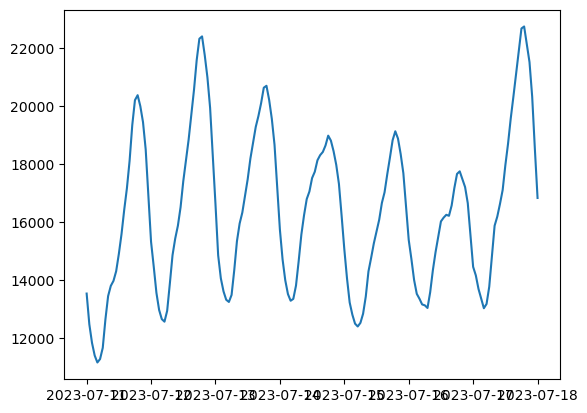

In [106]:
# draw df_data['gap1']
mask = (df_data['date'] >= '2023-7-10') & (df_data['date'] <= '2023-7-17')
df_data_tmp = df_data.loc[mask, :]
time = df_data_tmp['date'] + datetime.timedelta(days=1)
plt.plot(time, df_data_tmp['gap1'])
plt.show()

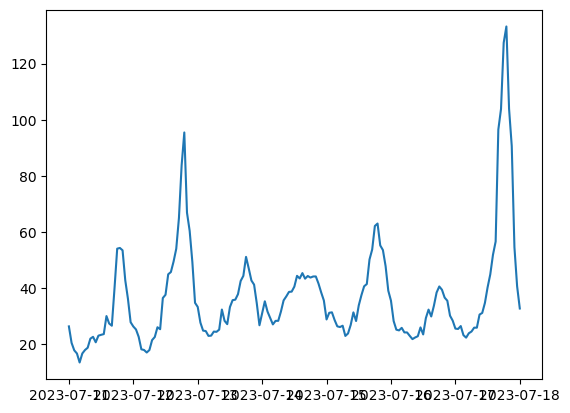

In [75]:
# draw df_data['Price']
mask = (df_data['date'] >= '2023-7-11') & (df_data['date'] <= '2023-7-18')
df_data_tmp = df_data.loc[mask, :]
plt.plot(df_data_tmp['date'], df_data_tmp['Price'])
plt.show()
# plt.savefig('E:\day-ahead price\Document\Document/demand-price.pdf', dpi=1200)

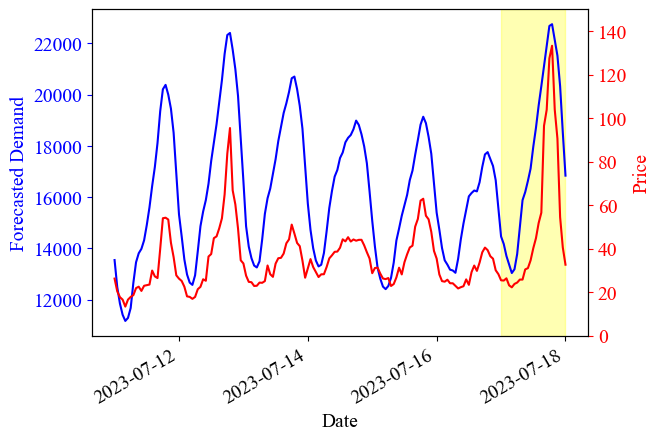

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.dates as mdates

# 设置字体属性
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 假设 df_data 是你的数据框

# 绘制 df_data['gap1']
mask1 = (df_data['date'] >= '2023-7-10') & (df_data['date'] <= '2023-7-17')
df_data_tmp1 = df_data.loc[mask1, :]
time1 = df_data_tmp1['date'] + datetime.timedelta(days=1)

# 绘制 df_data['Price']
mask2 = (df_data['date'] >= '2023-7-11') & (df_data['date'] <= '2023-7-18')
df_data_tmp2 = df_data.loc[mask2, :]

fig, ax1 = plt.subplots()

# 绘制第一个数据集
ax1.plot(time1, df_data_tmp1['gap1'], 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Forecasted Demand', color='b')
# ax1.set_ylim([0, 100])  # 调整第一个 y 轴的范围

# 设置 x 轴刻度每两天显示一次
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 设置左边 y 轴刻度标签颜色
ax1.tick_params(axis='y', colors='b')

# 添加淡黄色背景区域
start_date = datetime.datetime.strptime('2023-07-17', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2023-07-18', '%Y-%m-%d')
ax1.axvspan(start_date, end_date, color='yellow', alpha=0.3)

# 创建第二个 y 轴
ax2 = ax1.twinx()
ax2.plot(df_data_tmp2['date'], df_data_tmp2['Price'], 'r-')
ax2.set_ylabel('Price', color='r')
ax2.set_ylim([0, 150])  # 调整第二个 y 轴的范围

# 设置右边 y 轴刻度标签颜色
ax2.tick_params(axis='y', colors='r')

fig.autofmt_xdate()  # 自动旋转日期标签以防止重叠
plt.savefig('E:\day-ahead price\Document\Document/demand-price.pdf', dpi=1200)

plt.show()




2023-07-17


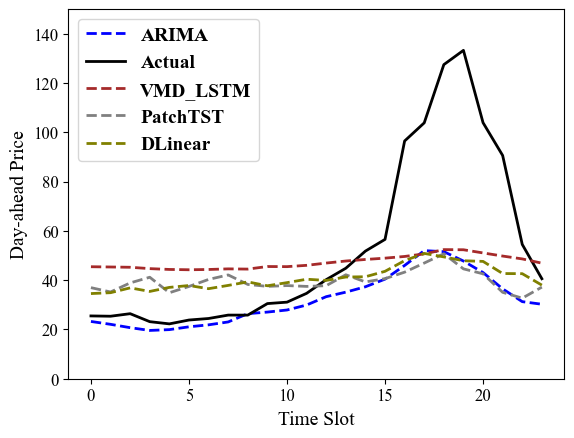

In [101]:

date = datetime.date(2023, 7, 16)

date += datetime.timedelta(days=1)
date = date.strftime('%Y-%m-%d')
df_pred_CTF_tmp = df_pred_CTF.loc[df_pred_CTF.index == date, :]
df_pred_iTF_tmp = df_pred_iTF.loc[df_pred_iTF.index == date, :]
df_pred_rf_tmp = df_pred_rf.loc[df_pred_rf['Date'] == date, :]
df_pred_DNN_tmp = df_pred_DNN.loc[df_pred_DNN.index == date, :]
df_pred_VMD_LSTM_tmp = df_pred_VMD_LSTM.loc[df_pred_VMD_LSTM.index == date, :]
df_pred_PatchTST_tmp = df_pred_PatchTST.loc[df_pred_PatchTST.index == date, :]
df_pred_my_tmp = df_pred_my.loc[df_pred_my['Date'].dt.date == pd.to_datetime(date).date(), :]
df_pred_Autoformer_tmp = df_pred_Autoformer.loc[df_pred_Autoformer.index == date, :]
df_pred_FEDformer_tmp = df_pred_FEDformer.loc[df_pred_FEDformer.index == date, :]
df_pred_Koopa_tmp = df_pred_Koopa.loc[df_pred_Koopa.index == date, :]
df_pred_Informer_tmp = df_pred_Informer.loc[df_pred_Informer.index == date, :]
df_pred_DLinear_tmp = df_pred_DLinear.loc[df_pred_DLinear.index == date, :]
df_pred_xgb_tmp = df_pred_xgb.loc[df_pred_xgb['Date'] == date, :]
df_pred_svm_tmp = df_pred_svm.loc[df_pred_svm['Date'] == date, :]
df_pred_Linear_tmp = df_pred_Linear.loc[df_pred_Linear['Date'] == date, :]
df_pred_arima_tmp = df_pred_arima.loc[df_pred_arima['Date'] == date, :]

df_pred_rf_tmp = df_pred_rf_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_rf_tmp = [i for i in df_pred_rf_tmp if i != '']
df_pred_rf_tmp = [float(i) for i in df_pred_rf_tmp]
df_pred_my_tmp = df_pred_my_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_my_tmp = [i for i in df_pred_my_tmp if i != '']
df_pred_my_tmp = [float(i) for i in df_pred_my_tmp]
df_pred_xgb_tmp = df_pred_xgb_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_xgb_tmp = [i for i in df_pred_xgb_tmp if i != '']
df_pred_xgb_tmp = [float(i) for i in df_pred_xgb_tmp]
df_pred_svm_tmp = df_pred_svm_tmp['pred'].values[0].replace('\n', '').replace(',', '').replace('array(', '').replace(')', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_svm_tmp = [i for i in df_pred_svm_tmp if i != '']
df_pred_svm_tmp = [float(i) for i in df_pred_svm_tmp]
df_pred_Linear_tmp = df_pred_Linear_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_Linear_tmp = [i for i in df_pred_Linear_tmp if i != '']
df_pred_Linear_tmp = [float(i) for i in df_pred_Linear_tmp]
df_pred_arima_tmp = df_pred_arima_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_arima_tmp = [i for i in df_pred_arima_tmp if i != '']
df_pred_arima_tmp = [float(i) for i in df_pred_arima_tmp]
true_price = df_data.loc[df_data['date'].dt.date == pd.to_datetime(date).date(), 'Price'].reset_index(drop=True)
print(date)
plt.cla()

# Set the limits for the y-axis
plt.ylim(0, 150)

# Set the labels for the x and y axes with Times New Roman font
plt.xlabel('Time Slot', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.ylabel('Day-ahead Price', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})

# Set the font for the tick labels
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')

# Plot the data with custom labels and styles
plt.plot(df_pred_arima_tmp, label='ARIMA', color='blue', linestyle='dashed', linewidth=2)
plt.plot(true_price, label='Actual', color='black', linestyle='solid', linewidth=2)
# plt.plot(df_pred_my_tmp, label='CoPiLinear', color='red', linestyle='solid', linewidth=2)
plt.plot(df_pred_VMD_LSTM_tmp.iloc[0, :], label='VMD_LSTM', color='brown', linestyle='dashed', linewidth=2)
plt.plot(df_pred_PatchTST_tmp.iloc[0, :], label='PatchTST', color='gray', linestyle='dashed', linewidth=2)

plt.plot(df_pred_DLinear_tmp.iloc[0, :], label='DLinear', color='olive', linestyle='dashed', linewidth=2)


# Customize the legend with Times New Roman font
plt.legend(fontsize=14, prop={'size': 14, 'weight': 'bold', 'family': 'Times New Roman'})

# Save the figure as a PDF
plt.savefig('E:\day-ahead price\Document\Document/shortcoming3.pdf', dpi=1200)

# Show the plot
plt.show()


2023-07-17


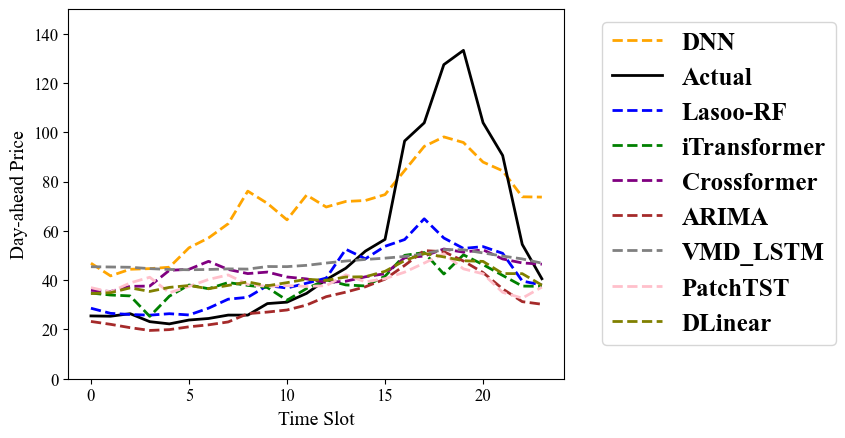

In [29]:

date = datetime.date(2023, 7, 16)

date += datetime.timedelta(days=1)
date = date.strftime('%Y-%m-%d')
df_pred_CTF_tmp = df_pred_CTF.loc[df_pred_CTF.index == date, :]
df_pred_iTF_tmp = df_pred_iTF.loc[df_pred_iTF.index == date, :]
df_pred_rf_tmp = df_pred_rf.loc[df_pred_rf['Date'] == date, :]
df_pred_DNN_tmp = df_pred_DNN.loc[df_pred_DNN.index == date, :]
df_pred_VMD_LSTM_tmp = df_pred_VMD_LSTM.loc[df_pred_VMD_LSTM.index == date, :]
df_pred_PatchTST_tmp = df_pred_PatchTST.loc[df_pred_PatchTST.index == date, :]
df_pred_my_tmp = df_pred_my.loc[df_pred_my['Date'].dt.date == pd.to_datetime(date).date(), :]
df_pred_Autoformer_tmp = df_pred_Autoformer.loc[df_pred_Autoformer.index == date, :]
df_pred_FEDformer_tmp = df_pred_FEDformer.loc[df_pred_FEDformer.index == date, :]
df_pred_Koopa_tmp = df_pred_Koopa.loc[df_pred_Koopa.index == date, :]
df_pred_Informer_tmp = df_pred_Informer.loc[df_pred_Informer.index == date, :]
df_pred_DLinear_tmp = df_pred_DLinear.loc[df_pred_DLinear.index == date, :]
df_pred_xgb_tmp = df_pred_xgb.loc[df_pred_xgb['Date'] == date, :]
df_pred_svm_tmp = df_pred_svm.loc[df_pred_svm['Date'] == date, :]
df_pred_Linear_tmp = df_pred_Linear.loc[df_pred_Linear['Date'] == date, :]
df_pred_arima_tmp = df_pred_arima.loc[df_pred_arima['Date'] == date, :]

df_pred_rf_tmp = df_pred_rf_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_rf_tmp = [i for i in df_pred_rf_tmp if i != '']
df_pred_rf_tmp = [float(i) for i in df_pred_rf_tmp]
df_pred_my_tmp = df_pred_my_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_my_tmp = [i for i in df_pred_my_tmp if i != '']
df_pred_my_tmp = [float(i) for i in df_pred_my_tmp]
df_pred_xgb_tmp = df_pred_xgb_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_xgb_tmp = [i for i in df_pred_xgb_tmp if i != '']
df_pred_xgb_tmp = [float(i) for i in df_pred_xgb_tmp]
df_pred_svm_tmp = df_pred_svm_tmp['pred'].values[0].replace('\n', '').replace(',', '').replace('array(', '').replace(')', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_svm_tmp = [i for i in df_pred_svm_tmp if i != '']
df_pred_svm_tmp = [float(i) for i in df_pred_svm_tmp]
df_pred_Linear_tmp = df_pred_Linear_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_Linear_tmp = [i for i in df_pred_Linear_tmp if i != '']
df_pred_Linear_tmp = [float(i) for i in df_pred_Linear_tmp]
df_pred_arima_tmp = df_pred_arima_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
df_pred_arima_tmp = [i for i in df_pred_arima_tmp if i != '']
df_pred_arima_tmp = [float(i) for i in df_pred_arima_tmp]
true_price = df_data.loc[df_data['date'].dt.date == pd.to_datetime(date).date(), 'Price'].reset_index(drop=True)
print(date)
plt.cla()

# Set the limits for the y-axis
plt.ylim(0, 150)

# Set the labels for the x and y axes with Times New Roman font
plt.xlabel('Time Slot', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.ylabel('Day-ahead Price', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})

# Set the font for the tick labels
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')

# Plot the data with custom labels and styles
plt.plot(df_pred_DNN_tmp.iloc[0, :], label='DNN', color='orange', linestyle='dashed', linewidth=2)
plt.plot(true_price, label='Actual', color='black', linestyle='solid', linewidth=2)
# plt.plot(df_pred_my_tmp, label='CoPiLinear', color='red', linestyle='solid', linewidth=2)
plt.plot(df_pred_rf_tmp, label='Lasoo-RF', color='blue', linestyle='dashed', linewidth=2)
plt.plot(df_pred_iTF_tmp.iloc[0, :], label='iTransformer', color='green', linestyle='dashed', linewidth=2)
plt.plot(df_pred_CTF_tmp.iloc[0, :], label='Crossformer', color='purple', linestyle='dashed', linewidth=2)
plt.plot(df_pred_arima_tmp, label='ARIMA', color='brown', linestyle='dashed', linewidth=2)

plt.plot(df_pred_VMD_LSTM_tmp.iloc[0, :], label='VMD_LSTM', color='gray', linestyle='dashed', linewidth=2)
plt.plot(df_pred_PatchTST_tmp.iloc[0, :], label='PatchTST', color='pink', linestyle='dashed', linewidth=2)

plt.plot(df_pred_DLinear_tmp.iloc[0, :], label='DLinear', color='olive', linestyle='dashed', linewidth=2)


# # Customize the legend with Times New Roman font
# plt.legend(fontsize=14, prop={'size': 14, 'weight': 'bold', 'family': 'Times New Roman'})
# Customize the legend with Times New Roman font and place it outside the plot
plt.legend(fontsize=18, prop={'size': 18, 'weight': 'bold', 'family': 'Times New Roman'}, bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure as a PDF
plt.savefig('E:\day-ahead price\Document\Document/shortcoming6.pdf', dpi=1200, bbox_inches='tight')

# Show the plot
plt.show()



In [20]:
def loss(target, prediction):
    if np.isnan(target).all() or np.isnan(prediction).all():
        return 0, 0, 0, 0
    from math import sqrt
    error = []
    pError = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])
        
        # if target[i] < 55:
        #     a = 55
        # else:
        #     a = target[i]
        # if prediction[i] < 55:
        #     b = 55
        # else:
        #     b = prediction[i]
        pError.append(abs(target[i] - prediction[i]) / ((abs(target[i]) + abs(prediction[i]))/2))

    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)#target-prediction之差平方 
        absError.append(abs(val))#误差绝对值
    mse = sum(squaredError) / len(squaredError)#均方误差MSE
    rmse = sqrt(sum(squaredError) / len(squaredError))#均方根误差RMSE
    mae = sum(absError) / len(absError)#平均绝对误差MAE
    smape = sum(pError) / len(absError)
    return mse, rmse, mae, smape
df_data['date'] = pd.to_datetime(df_data['date'])
mae_list = []
smape_list = []
date_list = []
for date in pd.date_range(start='2023-1-1', end='2023-12-31'):

    date += datetime.timedelta(days=1)
    date = date.strftime('%Y-%m-%d')
    df_pred_CTF_tmp = df_pred_CTF.loc[df_pred_CTF.index == date, :]
    df_pred_iTF_tmp = df_pred_iTF.loc[df_pred_iTF.index == date, :]
    df_pred_rf_tmp = df_pred_rf.loc[df_pred_rf['Date'] == date, :]
    df_pred_DNN_tmp = df_pred_DNN.loc[df_pred_DNN.index == date, :]
    df_pred_VMD_LSTM_tmp = df_pred_VMD_LSTM.loc[df_pred_VMD_LSTM.index == date, :]
    df_pred_PatchTST_tmp = df_pred_PatchTST.loc[df_pred_PatchTST.index == date, :]
    df_pred_my_tmp = df_pred_my.loc[df_pred_my['Date'].dt.date == pd.to_datetime(date).date(), :]
    df_pred_Autoformer_tmp = df_pred_Autoformer.loc[df_pred_Autoformer.index == date, :]
    df_pred_FEDformer_tmp = df_pred_FEDformer.loc[df_pred_FEDformer.index == date, :]
    df_pred_Koopa_tmp = df_pred_Koopa.loc[df_pred_Koopa.index == date, :]
    df_pred_Informer_tmp = df_pred_Informer.loc[df_pred_Informer.index == date, :]
    df_pred_DLinear_tmp = df_pred_DLinear.loc[df_pred_DLinear.index == date, :]
    df_pred_xgb_tmp = df_pred_xgb.loc[df_pred_xgb['Date'] == date, :]
    df_pred_svm_tmp = df_pred_svm.loc[df_pred_svm['Date'] == date, :]
    df_pred_Linear_tmp = df_pred_Linear.loc[df_pred_Linear['Date'] == date, :]
    df_pred_arima_tmp = df_pred_arima.loc[df_pred_arima['Date'] == date, :]
    
    if len(df_pred_rf_tmp) == 0 or len(df_pred_iTF_tmp) == 0 or len(df_pred_CTF_tmp) == 0 or len(df_pred_DNN_tmp) == 0 or len(df_pred_VMD_LSTM_tmp) == 0 or len(df_pred_PatchTST_tmp) == 0 or len(df_pred_my_tmp) == 0 or len(df_pred_Autoformer_tmp) == 0 or len(df_pred_FEDformer_tmp) == 0 or len(df_pred_Koopa_tmp) == 0 or len(df_pred_Informer_tmp) == 0 or len(df_pred_DLinear_tmp) == 0 or len(df_pred_xgb_tmp) == 0 or len(df_pred_svm_tmp) == 0 or len(df_pred_Linear_tmp) == 0 or len(df_pred_arima_tmp) == 0:
        continue
    df_pred_rf_tmp = df_pred_rf_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_rf_tmp = [i for i in df_pred_rf_tmp if i != '']
    df_pred_rf_tmp = [float(i) for i in df_pred_rf_tmp]
    df_pred_my_tmp = df_pred_my_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_my_tmp = [i for i in df_pred_my_tmp if i != '']
    df_pred_my_tmp = [float(i) for i in df_pred_my_tmp]
    df_pred_xgb_tmp = df_pred_xgb_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_xgb_tmp = [i for i in df_pred_xgb_tmp if i != '']
    df_pred_xgb_tmp = [float(i) for i in df_pred_xgb_tmp]
    df_pred_svm_tmp = df_pred_svm_tmp['pred'].values[0].replace('\n', '').replace(',', '').replace('array(', '').replace(')', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_svm_tmp = [i for i in df_pred_svm_tmp if i != '']
    df_pred_svm_tmp = [float(i) for i in df_pred_svm_tmp]
    df_pred_Linear_tmp = df_pred_Linear_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_Linear_tmp = [i for i in df_pred_Linear_tmp if i != '']
    df_pred_Linear_tmp = [float(i) for i in df_pred_Linear_tmp]
    df_pred_arima_tmp = df_pred_arima_tmp['pred'].values[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    df_pred_arima_tmp = [i for i in df_pred_arima_tmp if i != '']
    df_pred_arima_tmp = [float(i) for i in df_pred_arima_tmp]
    
    
    true_price = df_data.loc[df_data['date'].dt.date == pd.to_datetime(date).date(), 'Price'].reset_index(drop=True)
    
    mse, rmse, mae, smape = loss(true_price, df_pred_rf_tmp)
    mse1, rmse1, mae1, smape1 = loss(true_price, df_pred_iTF_tmp.iloc[0, :])
    mse2, rmse2, mae2, smape2 = loss(true_price, df_pred_CTF_tmp.iloc[0, :])
    mse3, rmse3, mae3, smape3 = loss(true_price, df_pred_DNN_tmp.iloc[0, :])
    mse4, rmse4, mae4, smape4 = loss(true_price, df_pred_my_tmp)
    mse5, rmse5, mae5, smape5 = loss(true_price, df_pred_VMD_LSTM_tmp.iloc[0, :])
    mse6, rmse6, mae6, smape6 = loss(true_price, df_pred_PatchTST_tmp.iloc[0, :])
    mse7, rmse7, mae7, smape7 = loss(true_price, df_pred_Autoformer_tmp.iloc[0, :])
    mse8, rmse8, mae8, smape8 = loss(true_price, df_pred_FEDformer_tmp.iloc[0, :])
    mse9, rmse9, mae9, smape9 = loss(true_price, df_pred_Koopa_tmp.iloc[0, :])
    mse10, rmse10, mae10, smape10 = loss(true_price, df_pred_Informer_tmp.iloc[0, :])
    mse11, rmse11, mae11, smape11 = loss(true_price, df_pred_DLinear_tmp.iloc[0, :])
    mse12, rmse12, mae12, smape12 = loss(true_price, df_pred_xgb_tmp)
    mse13, rmse13, mae13, smape13 = loss(true_price, df_pred_svm_tmp)
    mse14, rmse14, mae14, smape14 = loss(true_price, df_pred_Linear_tmp)
    mse15, rmse15, mae15, smape15 = loss(true_price, df_pred_arima_tmp)
    mae_list.append([mae, mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10, mae11, mae12, mae13, mae14, mae15])
    smape_list.append([smape, smape1, smape2, smape3, smape4, smape5, smape6, smape7, smape8, smape9, smape10, smape11, smape12, smape13, smape14, smape15])
    date_list.append(date)

    # # Customize the legend with Times New Roman font
    # plt.legend(fontsize=14, prop={'size': 12, 'weight': 'bold', 'family': 'Times New Roman'})

    # # Save the figure as a PDF
    # # plt.savefig('E:\day-ahead price\Document\Document/shortcoming1.pdf', dpi=1200)

    # # Show the plot
    # plt.show()

df_loss = pd.DataFrame(mae_list, index=date_list, columns=['RF', 'iTransformer', 'Crossformer', 'DNN', 'CoPiLinear', 'VMD_LSTM', 'PatchTST', 'Autoformer', 'FEDformer', 'Koopa', 'Informer', 'DLinear', 'XGBoost', 'SVM', 'Linear', 'ARIMA'])

In [21]:
df_loss

,RF,iTransformer,Crossformer,DNN,CoPiLinear,VMD_LSTM,PatchTST,Autoformer,FEDformer,Koopa,Informer,DLinear,XGBoost,SVM,Linear,ARIMA
2023-01-02,4.882648,19.954043,25.567928,15.766749,6.011446,17.352136,24.725547,104.260591,112.860823,22.612376,10.265543,14.503418,4.791095,24.822519,50.022683,23.181971
2023-01-03,7.351040,19.503141,17.811787,19.486633,13.547738,9.250304,15.164499,92.368403,91.441295,21.059574,13.940389,9.639197,9.716678,20.003766,33.561818,15.888602
2023-01-04,9.492550,14.125180,23.555829,5.176646,8.865760,17.262636,17.061420,54.713730,59.183642,10.568531,8.207095,6.461726,7.127671,27.146865,29.180455,19.949455
2023-01-05,28.275826,13.024742,23.205680,6.575452,9.762333,18.631688,13.982452,23.046300,26.565689,14.219427,10.150690,8.486626,14.687260,33.851003,35.421632,15.258266
2023-01-06,10.555651,9.734495,8.383194,26.450064,9.527741,16.589099,8.134200,21.681362,10.960424,6.832634,8.245194,7.504323,17.390229,33.698076,41.013382,12.341125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,7.532579,6.721703,4.192674,4.303311,3.677397,14.895239,3.446795,14.928828,11.068093,4.516128,5.097511,3.859277,2.090002,9.995632,17.211505,4.510014
2023-12-28,4.383539,5.923017,5.607196,5.324086,2.631525,15.374496,5.440765,12.792681,11.707216,6.321653,3.303693,5.896452,2.967564,9.969490,14.408084,4.624540
2023-12-29,2.801909,5.282639,4.691504,3.956476,3.871299,12.604185,3.940286,7.451769,5.699539,5.448088,4.007668,4.933513,4.029619,5.629103,8.268511,5.835818
2023-12-30,4.720594,5.397549,5.482269,4.194857,6.658504,11.112873,4.853391,5.572288,7.209305,4.969674,3.085983,3.312555,5.648191,3.947389,6.735240,4.784661


In [22]:
df_loss.dropna(inplace=True)
df_loss.describe()

,RF,iTransformer,Crossformer,DNN,CoPiLinear,VMD_LSTM,PatchTST,Autoformer,FEDformer,Koopa,Informer,DLinear,XGBoost,SVM,Linear,ARIMA
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,9.424432,13.401700,13.016430,18.639678,8.024003,22.217598,12.706053,21.036289,19.233225,13.001605,13.784884,14.244808,10.248907,14.730574,32.833898,9.228508
std,10.547819,17.975094,16.629275,21.926016,10.486351,13.429167,17.650591,21.872549,21.373206,18.009298,16.979307,16.083337,10.638194,14.561656,17.717139,10.599468
min,0.150951,2.142285,1.215859,2.817198,0.291481,3.371520,1.055835,3.497335,3.821377,0.875136,2.361933,0.319964,1.793429,1.574847,0.000000,1.671773
25%,4.039628,5.278446,5.183318,6.217579,3.279955,14.698638,4.860630,8.885801,9.207400,5.124124,5.946328,6.509756,4.593686,6.965269,20.653963,4.383471
50%,5.984369,7.818143,7.610951,9.781042,4.770256,20.778660,7.040265,14.504503,12.732991,7.530159,8.275036,10.097339,6.775751,11.118054,28.997527,6.114064
75%,9.664670,13.425480,13.235872,20.112164,7.861033,27.253532,12.942003,22.673023,20.334742,12.419448,13.586692,15.141294,10.699587,18.458370,41.414257,10.000372
max,87.841690,154.585140,143.508622,151.679343,104.603116,149.346087,152.514465,177.717078,191.555010,151.469316,151.157635,142.565688,89.639893,148.722364,128.703339,129.733883


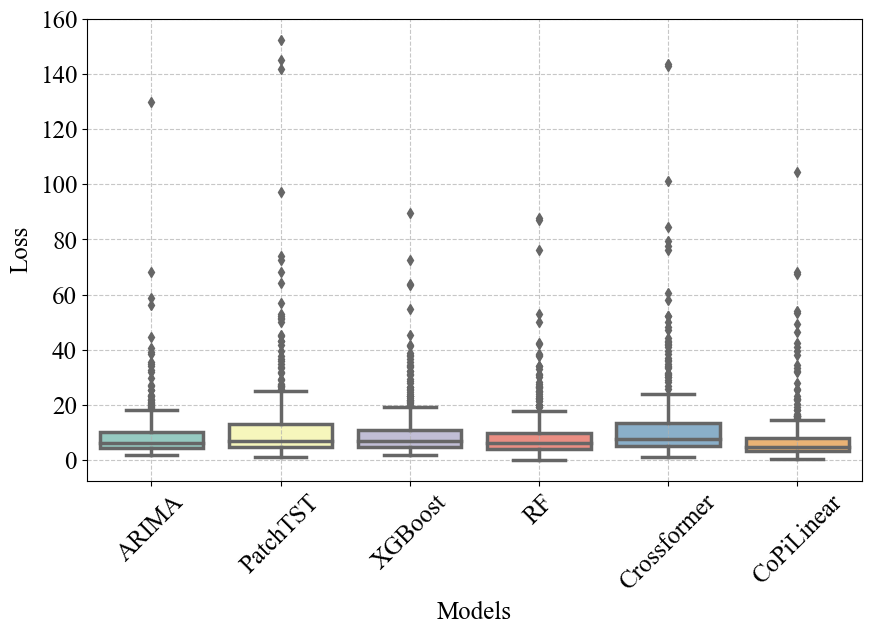

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df_comp 已经定义
plt.figure(figsize=(10, 6))
df_comp = df_loss[['ARIMA','PatchTST', 'XGBoost', 'RF', 'Crossformer', 'CoPiLinear']]
sns.boxplot(data=df_comp, palette="Set3", linewidth=2.5)

# 设置字体和字号
plt.xticks(rotation=45, fontsize=18, fontname='Times New Roman')
plt.yticks(fontsize=18, fontname='Times New Roman')
# plt.title('Comparison of Models', fontsize=18, fontname='Times New Roman')
plt.xlabel('Models', fontsize=18, fontname='Times New Roman')
plt.ylabel('Loss', fontsize=18, fontname='Times New Roman')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [26]:
df_loss['Lasoo-RF'] = df_loss['RF']
df_loss.drop(columns=['RF'], inplace=True)
df_comp = df_loss[['ARIMA','PatchTST', 'XGBoost', 'Lasoo-RF', 'Crossformer', 'CoPiLinear']]
# df_comp average every 30 index
df_comp = df_comp.groupby(np.arange(len(df_comp))//30).mean()


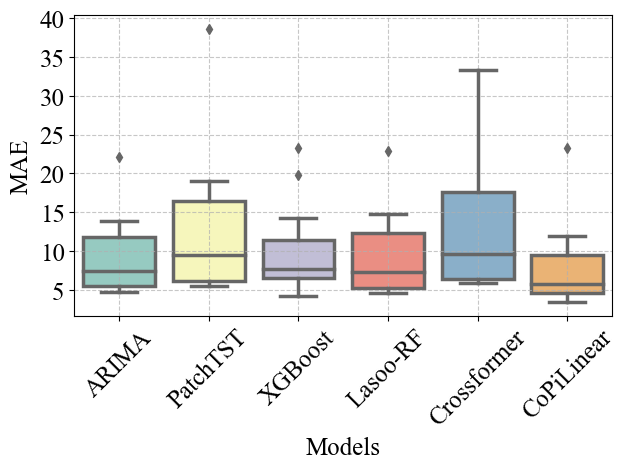

In [27]:
sns.boxplot(data=df_comp, palette="Set3", linewidth=2.5)

# 设置字体和字号
plt.xticks(rotation=45, fontsize=18, fontname='Times New Roman')
plt.yticks(fontsize=18, fontname='Times New Roman')
# plt.title('Comparison of Models', fontsize=18, fontname='Times New Roman')
plt.xlabel('Models', fontsize=18, fontname='Times New Roman')
plt.ylabel('MAE', fontsize=18, fontname='Times New Roman')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)
# 调整布局并保存图表
plt.tight_layout()
plt.savefig('E:\\day-ahead price\\Document\\Document\\reliable.pdf', dpi=1200, bbox_inches='tight')
plt.show()